In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df={'x':[1,2,3,4,5],'y':[2,4,6,8,10]}
d=pd.DataFrame(df)
d

,x,y
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [ ]:
x=d['x'].values
y=d['y'].values
x_m=np.mean(x)
y_m=np.mean(y)

In [ ]:
numerator=np.sum((x-x_m)*(y-y_m))
denominator=np.sum((y-y_m)**2)
m=(numerator)/(denominator)
m

np.float64(0.5)

In [ ]:
c=y_m-m*x_m

c

np.float64(4.5)

In [ ]:
x_i=int(input("Give Input For The Model:"))

Give Input For The Model:5


In [ ]:
y_p=m*x_i+c
y_p

np.float64(7.0)

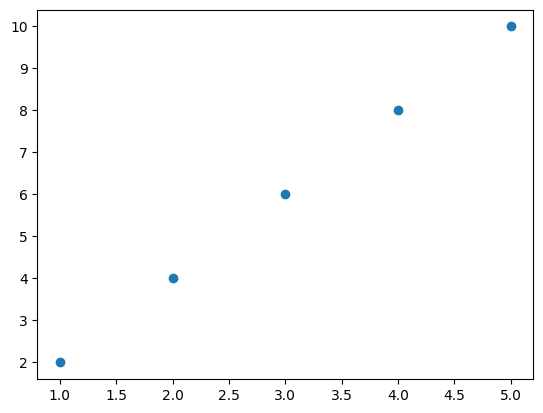

In [ ]:
plt.scatter(x,y,marker='o')

**WITH LIB Exercise**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv('canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [ ]:
df.rename(columns={'per capita income (US$)':'Income'}, inplace=True)
df.head()


,year,Income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


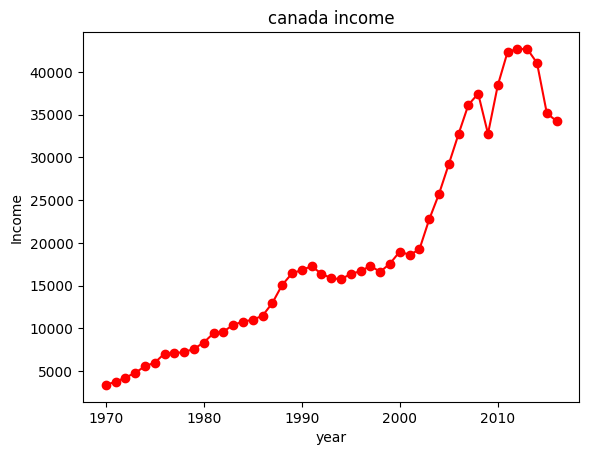

In [ ]:
plt.plot(df['year'],df['Income'], color='r', marker='o')
plt.title('canada income')
plt.xlabel('year')
plt.ylabel('Income')
plt.show()

In [ ]:
reg=LinearRegression()
reg.fit(df[['year']],df.Income)

LinearRegression()

In [ ]:
reg.predict([[2025]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45431.01947053])

In [ ]:
reg.coef_


array([828.46507522])

In [ ]:
reg.intercept_

np.float64(-1632210.7578554575)

In [ ]:
828.46507522*2025-1632210.7578554575

45431.01946504251

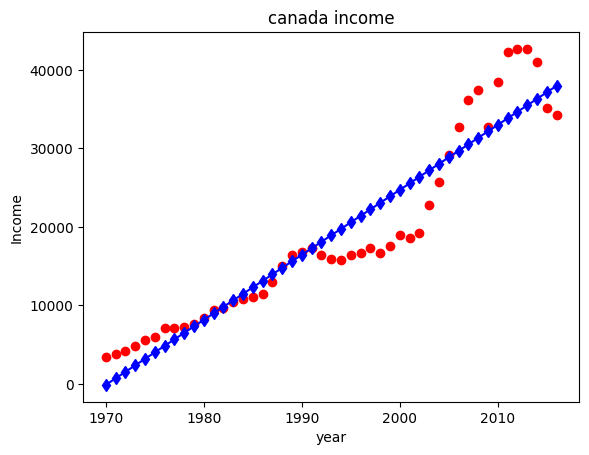

In [ ]:
plt.scatter(df['year'],df['Income'], color='r', marker='o')
plt.plot(df['year'],reg.predict(df[['year']]), color='b', marker='d')
plt.title('canada income')
plt.xlabel('year')
plt.ylabel('Income')
plt.show()

In [ ]:
reg.score(df[['year']],df.Income)

0.890916917957032

**Multiple Points Linear Regression**

In [ ]:
hf=pd.read_csv('hiring.csv')
hf


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
hf.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score','salary($)':'salary'}, inplace=True)
hf

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
import math
hf.test_score.fillna(hf.test_score.mean(),inplace=True)
hf


/tmp/ipython-input-71-153555424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf.test_score.fillna(hf.test_score.mean(),inplace=True)


,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,five,6.000000,7,60000
3,two,10.000000,10,65000
4,seven,9.000000,6,70000
5,three,7.000000,10,62000
6,ten,7.857143,7,72000
7,eleven,7.000000,8,80000


In [ ]:
numbers={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,'eleven':11}
nu=hf['experience'].values
nu.tolist()

[nan, nan, 'five', 'two', 'seven', 'three', 'ten', 'eleven']

In [ ]:
nu=nu[2:]
nu=nu.tolist()

In [ ]:
for i in range(len(nu)):
  nu[i]=numbers[nu[i]]

In [ ]:
nu

[5, 2, 7, 3, 10, 11]

In [ ]:
hf['experience'][2:]=nu
hf

/tmp/ipython-input-86-76018152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf['experience'][2:]=nu


,experience,test_score,interview_score,salary
0,NaN,8.000000,9,50000
1,NaN,8.000000,6,45000
2,5,6.000000,7,60000
3,2,10.000000,10,65000
4,7,9.000000,6,70000
5,3,7.000000,10,62000
6,10,7.857143,7,72000
7,11,7.000000,8,80000


In [ ]:
hf['experience'].fillna(hf.experience.median(),inplace=True)
hf

/tmp/ipython-input-87-1592520723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hf['experience'].fillna(hf.experience.median(),inplace=True)
/tmp/ipython-input-87-1592520723.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hf['experience'].fillna(hf.experience.median(),inplace=True)


,experience,test_score,interview_score,salary
0,6.0,8.000000,9,50000
1,6.0,8.000000,6,45000
2,5.0,6.000000,7,60000
3,2.0,10.000000,10,65000
4,7.0,9.000000,6,70000
5,3.0,7.000000,10,62000
6,10.0,7.857143,7,72000
7,11.0,7.000000,8,80000


In [ ]:
mulreg=LinearRegression()
mulreg.fit(hf[['experience','test_score','interview_score']],hf.salary)

LinearRegression()

AttributeError: 'LinearRegression' object has no attribute 'compile'

In [ ]:
mulreg.coef_

array([2823.76559304, 1329.00027432, 2929.14459978])

In [ ]:
mulreg.intercept_

np.float64(11842.306307731225)

In [ ]:
mulreg.predict([[11,7,8]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75639.88654964])

In [ ]:
2823.76559304*9+1329.00027432*8+2929.14459978*7+11842.306307731225

68392.21103811123

In [ ]:
mulreg.score(hf[['experience','test_score','interview_score']],hf.salary)

0.3996333405592497

**Gradient Descent**

In [ ]:
def gd(x,y):
  n=len(x)
  m_c=b_c=0
  lr=0.01
  for i in range(1000):
    y_p=m_c*x+b_c
    cost=(2/n)*sum([val**2 for val in (y-y_p)])
    m_d=-(2/n)*(sum(x*(y-y_p)))
    b_d=-(2/n)*(sum(y-y_p))
    m_c=m_c-lr*m_d
    b_c=b_c-lr*b_d
    print(f"cost :{cost}, m :{m_c}, b :{b_c} , iterations :{i}")

In [ ]:
x=np.array([1,2,3,4,5,6])
y=np.array([2,4,6,8,10,12])
gd(x,y)

cost :121.33333333333333, m :0.6066666666666667, b :0.14 , iterations :0
cost :56.19672592592591, m :1.019511111111111, b :0.23473333333333335 , iterations :1
cost :26.04925818041152, m :1.3004947407407408, b :0.2986728888888889 , iterations :2
cost :12.095816164902752, m :1.4917709004938273, b :0.34166479925925924 , iterations :3
cost :5.637457231199479, m :1.622017191395885, b :0.37040754023950617 , iterations :4
cost :2.648049714176781, m :1.7107434488557012, b :0.3894581860370041 , iterations :5
cost :1.2641790689542305, m :1.7712225296802149, b :0.40191698089636496 , iterations :6
cost :0.6234011214661089, m :1.8124841736811375, b :0.4098930642008226 , iterations :7
cost :0.3265508172307726, m :1.8406714598371348, b :0.41482131075912654 , iterations :8
cost :0.1888825780657718, m :1.8599636252667318, b :0.4176778823553446 , iterations :9
cost :0.12489059270190553, m :1.8732038738376158, b :0.41912687093956646 , iterations :10
cost :0.09500019157095053, m :1.882326484474436, b :0.4

In [ ]:
import pickle
with open('reg_model','wb') as f:
  pickle.dump(reg,f)
with open('mul_reg_model','wb') as f:
  pickle.dump(mulreg,f)

for one hot encoding use pd.get_dummies(df.town)
for label encoding use LabelEncoding from sklearn.preprocessing and then le.fit_transfrom(df.town) **df.town is example


sklearn also OneHotEncoder But only uses numercal data

ohe=OneHotEncoder(categorical_feature=[0]) # for which column to be chosen


ohe.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import pandas as pd
car=pd.read_csv('carprices.csv')
car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [ ]:
le=LabelEncoder()
car['Car Model']=le.fit_transform(car['Car Model'])
car

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [ ]:
ohe=OneHotEncoder()
x=ohe.fit_transform(car[['Car Model']])


In [ ]:
x_df = pd.DataFrame(x.toarray())
x_df=x_df.iloc[:,1:] #for avoiding dummy values trap
x_df.head()

,1,2
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [ ]:
f=pd.concat([x_df,car], axis=1)

In [ ]:
f

,1,2,Car Model,Mileage,Sell Price($),Age(yrs)
0,1.0,0.0,1,69000,18000,6
1,1.0,0.0,1,35000,34000,3
2,1.0,0.0,1,57000,26100,5
3,1.0,0.0,1,22500,40000,2
4,1.0,0.0,1,46000,31500,4
5,0.0,0.0,0,59000,29400,5
6,0.0,0.0,0,52000,32000,5
7,0.0,0.0,0,72000,19300,6
8,0.0,0.0,0,91000,12000,8
9,0.0,1.0,2,67000,22000,6


In [ ]:
f = f.drop('Car Model', axis=1)


,1,2,Mileage,Sell Price($),Age(yrs)
0,1.0,0.0,69000,18000,6
1,1.0,0.0,35000,34000,3
2,1.0,0.0,57000,26100,5
3,1.0,0.0,22500,40000,2
4,1.0,0.0,46000,31500,4
5,0.0,0.0,59000,29400,5
6,0.0,0.0,52000,32000,5
7,0.0,0.0,72000,19300,6
8,0.0,0.0,91000,12000,8
9,0.0,1.0,67000,22000,6


In [ ]:
f

,1,2,Mileage,Sell Price($),Age(yrs)
0,1.0,0.0,69000,18000,6
1,1.0,0.0,35000,34000,3
2,1.0,0.0,57000,26100,5
3,1.0,0.0,22500,40000,2
4,1.0,0.0,46000,31500,4
5,0.0,0.0,59000,29400,5
6,0.0,0.0,52000,32000,5
7,0.0,0.0,72000,19300,6
8,0.0,0.0,91000,12000,8
9,0.0,1.0,67000,22000,6


In [ ]:
lr=LinearRegression()
f.rename(columns={2:'Benz',1:'BMW X5'}, inplace=True)
f

,BMW X5,Benz,Mileage,Sell Price($),Age(yrs)
0,1.0,0.0,69000,18000,6
1,1.0,0.0,35000,34000,3
2,1.0,0.0,57000,26100,5
3,1.0,0.0,22500,40000,2
4,1.0,0.0,46000,31500,4
5,0.0,0.0,59000,29400,5
6,0.0,0.0,52000,32000,5
7,0.0,0.0,72000,19300,6
8,0.0,0.0,91000,12000,8
9,0.0,1.0,67000,22000,6


In [ ]:
lr.fit(f[['Mileage','Age(yrs)','Benz','BMW X5']],f['Sell Price($)'])

LinearRegression()

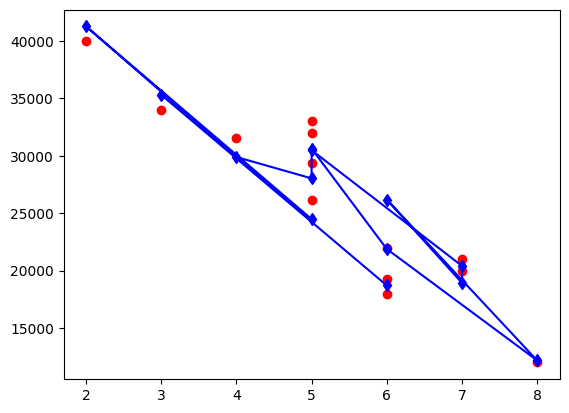

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(f['Age(yrs)'],f['Sell Price($)'], color='r', marker='o')
plt.plot(f['Age(yrs)'],lr.predict(f[['Mileage','Age(yrs)','Benz','BMW X5']]), color='b', marker='d')

In [ ]:
lr.score(f[['Mileage','Age(yrs)','Benz','BMW X5']],f['Sell Price($)'])

0.9417050937281082

In [ ]:
lr.predict([[12000,6,1,0]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46540.4390702])

Logistic regression is one of linear models
it uses sigmoid function to make the output ranges from 0 to 1 hence it can form best curved line for non linear data input unlike linear regression

it is two type. one just 2 inputs and another is more than 2 which is multiclass logistic regression



confusion matrix is how we can compare both predicted and correct values in rows and column. it helps to find where the model is not working well.

we use seaborn sns.heatmap() to visualize the confusion matrix

and plt.gray() , plt.matshow() is used to give image from image's numeric array data

**Logistic Regression With Multiclass (Iris Dataset)**

In [ ]:
from sklearn.datasets import load_iris
ir=load_iris()
ir

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
dir(ir)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
ir.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(ir.data,ir.target,test_size=0.2)

In [ ]:
len(X_train)


120

In [ ]:
len(X_test)

30

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
lr.coef_

array([[-0.40367484,  0.91249896, -2.4021895 , -1.01358035],
       [ 0.59965372, -0.36203362, -0.25707144, -0.829999  ],
       [-0.19597887, -0.55046534,  2.65926094,  1.84357935]])

In [ ]:
lr.intercept_

array([  9.36202511,   1.94541323, -11.30743833])

In [ ]:
lr.predict(X_test)

array([0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1,
       2, 1, 2, 0, 0, 1, 2, 1])

In [ ]:
lr.score(X_test,Y_test)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm= confusion_matrix(Y_test,lr.predict(X_test))
cm

array([[14,  0,  0],
       [ 0,  6,  1],
       [ 0,  0,  9]])

Text(95.72222222222221, 0.5, 'Truth')

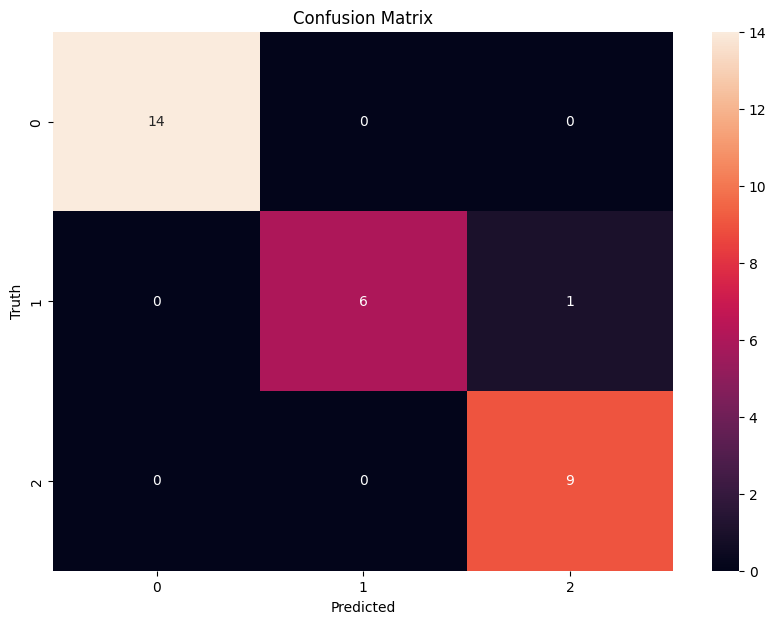

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Logistic regression with digits
**

In [ ]:
from sklearn.datasets import load_digits
digit=load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 640x480 with 0 Axes>

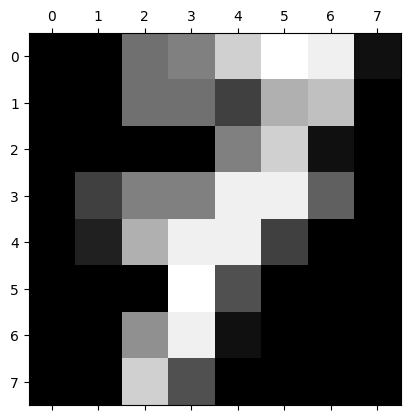

In [ ]:
plt.gray()
plt.matshow(digit.images[7])

In [ ]:
digit.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digit.data, digit.target, test_size=0.2)


lr.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(X_test)

array([7, 5, 8, 8, 3, 4, 2, 3, 4, 5, 7, 2, 8, 6, 7, 7, 8, 6, 3, 5, 4, 1,
       3, 9, 0, 2, 8, 1, 8, 0, 9, 0, 1, 3, 1, 3, 0, 1, 2, 4, 7, 0, 8, 1,
       4, 7, 6, 9, 6, 2, 2, 8, 7, 0, 1, 7, 5, 9, 5, 2, 9, 5, 8, 1, 1, 8,
       2, 4, 2, 9, 8, 3, 4, 2, 7, 8, 1, 9, 6, 2, 4, 4, 0, 1, 8, 6, 3, 7,
       3, 8, 9, 4, 0, 4, 4, 7, 0, 2, 4, 7, 3, 6, 3, 7, 6, 2, 3, 8, 8, 7,
       1, 1, 4, 9, 3, 6, 2, 7, 5, 2, 7, 3, 7, 0, 3, 6, 4, 9, 1, 5, 2, 1,
       2, 1, 8, 6, 0, 7, 1, 1, 6, 1, 7, 6, 6, 8, 8, 1, 2, 0, 9, 6, 1, 6,
       5, 2, 9, 1, 7, 9, 9, 5, 5, 9, 0, 0, 7, 1, 7, 5, 3, 1, 9, 2, 0, 8,
       4, 4, 0, 6, 1, 1, 0, 2, 9, 3, 5, 9, 6, 9, 2, 6, 1, 7, 8, 9, 7, 4,
       4, 2, 3, 3, 1, 6, 3, 7, 6, 5, 1, 5, 8, 1, 4, 4, 9, 4, 4, 2, 7, 6,
       7, 5, 7, 6, 8, 9, 9, 3, 1, 2, 2, 4, 9, 0, 8, 7, 2, 6, 0, 0, 4, 6,
       1, 2, 4, 9, 4, 2, 8, 4, 0, 3, 8, 9, 6, 3, 9, 4, 1, 0, 3, 9, 4, 9,
       8, 1, 4, 3, 7, 8, 7, 2, 2, 1, 4, 2, 4, 6, 0, 6, 5, 9, 0, 9, 9, 7,
       2, 3, 2, 8, 5, 5, 3, 1, 1, 9, 5, 7, 9, 6, 7,

In [ ]:
lr.score(X_test,y_test)

0.9666666666666667

In [ ]:
cn=confusion_matrix(y_test,lr.predict(X_test))
cn

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 43,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 35,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0, 22,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  2,  0,  1,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 40]])

Text(95.72222222222221, 0.5, 'Truth')

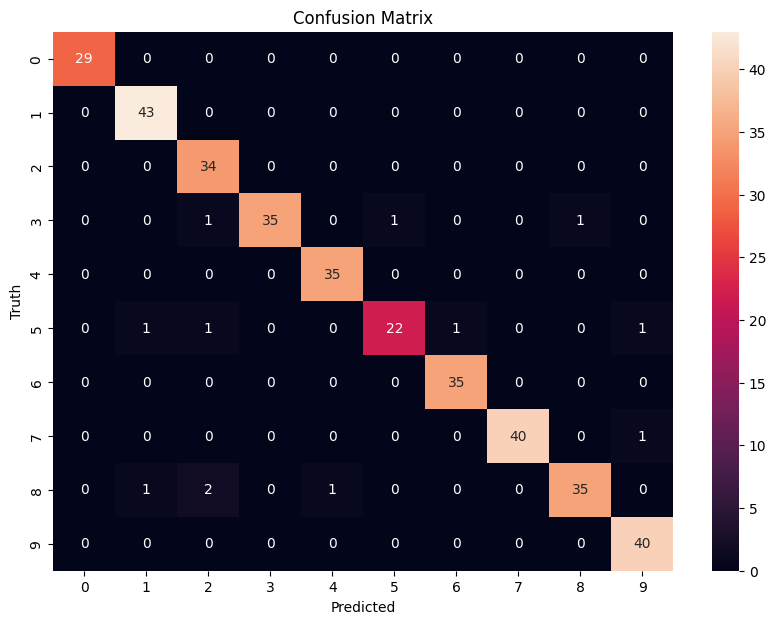

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cn,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Decision Trees With titanic dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
ti=pd.read_csv('titanic.csv')
ti

tin=ti[['Pclass','Sex','Age','Fare']]

In [ ]:
tin

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [ ]:
tt=ti['Survived']
tt

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
tin.Sex=tin.Sex.map({'male':1,'female':2})
tin.Age=tin.Age.fillna(tin.Age.mean())
tin

/tmp/ipython-input-77-1994610577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tin.Sex=tin.Sex.map({'male':1,'female':2})
/tmp/ipython-input-77-1994610577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tin.Age=tin.Age.fillna(tin.Age.mean())


,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,2,19.000000,30.0000
888,3,2,29.699118,23.4500
889,1,1,26.000000,30.0000


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(tin,tt,test_size=0.2)

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt.predict(x_test)

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1])

In [ ]:
dt.score(x_test,y_test)


0.7374301675977654

In [ ]:
cmm=confusion_matrix(y_test , dt.predict(x_test))
cmm

array([[85, 23],
       [24, 47]])

Text(95.72222222222221, 0.5, 'truth')

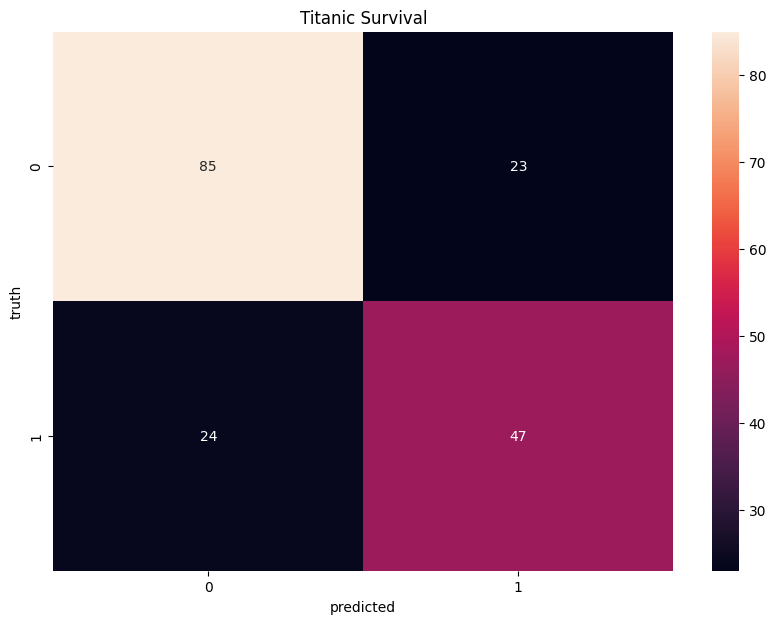

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cmm, annot=True)
plt.title("Titanic Survival")
plt.xlabel('predicted')
plt.ylabel('truth')

cross validation is used to cross validate other ml models to find which model performs the best

And With that I also applied svc (SVM) and random forest
svm predicts the best fit line .best when linear line
while random forest creates many random values to form many trees which leads to formation forest. it is good when dataset is large and needs random ness

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)

In [ ]:
cross_val_score(LinearRegression(), iris.data, iris.target, cv=3)


array([0., 0., 0.])

In [ ]:
cross_val_score(LogisticRegression(), iris.data, iris.target, cv=3)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.98, 0.96, 0.98])

In [ ]:
cross_val_score(SVC(), iris.data, iris.target, cv=3)


array([0.96, 0.98, 0.94])

In [ ]:
cross_val_score(RandomForestClassifier(n_estimators=15), iris.data, iris.target, cv=3)

array([0.98, 0.94, 0.98])

In [ ]:
sv=SVC()
sv.fit(x_train,y_train)

SVC()

In [ ]:
sv.score(x_test,y_test)

1.0

In [ ]:
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [ ]:
rf.score(x_test,y_test)

0.9333333333333333

**K Means Clustering** with MinMaxScaling and Elbow Method

we use min max scaling to scale the input from 0 to 1 . this is used to give more accurate plots and clustering due to uniform scaled values

elbow method is used to find the best n estimators value that gives best output
elbow point in plot is best estimator

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
iris=load_iris()


In [ ]:
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
inp=iris.data[:,:2]


In [ ]:
mm=MinMaxScaler()
inp=mm.fit_transform(inp)


In [ ]:
km=KMeans(n_clusters=3)
km.fit_predict(inp)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
km.cluster_centers_

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

In [ ]:
km.inertia_

37.0507021276596

Text(0, 0.5, 'Sepal Width')

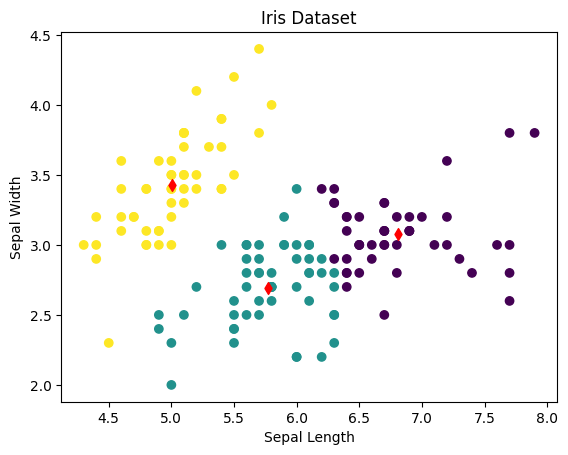

In [ ]:
plt.scatter(inp[:,0],inp[:,1],c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker='d')
plt.title('Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [ ]:
ssr=[]
for i in range(10):
  km=KMeans(n_clusters=i+1)
  km.fit_predict(inp)
  ssr.append(km.inertia_)
  print(i+1,km.inertia_)

1 130.4752666666667
2 58.21499731615675
3 37.0507021276596
4 28.034982153246226
5 21.589319784462646
6 19.417362691985524
7 16.608209667375107
8 13.862936406186412
9 12.215264079862571
10 9.630970057720065


Text(0, 0.5, 'SSR')

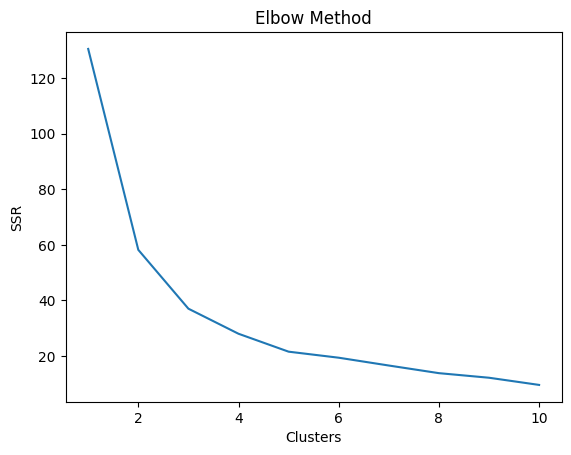

In [ ]:
plt.plot(range(1,11),ssr)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('SSR')

**Naive Bayes**

In [ ]:
from sklearn.datasets import load_wine
wine=load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
gnb.score(x_test,y_test)

0.9722222222222222

In [ ]:
mnb.score(x_test,y_test)

0.8888888888888888

In [ ]:
gnb.predict(x_test)

array([0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 1, 2, 0,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1])

In [ ]:
mnb.predict(x_test)

array([0, 0, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,gnb.predict(x_test))
cm1=confusion_matrix(y_test,mnb.predict(x_test))

Text(95.72222222222221, 0.5, 'Truth')

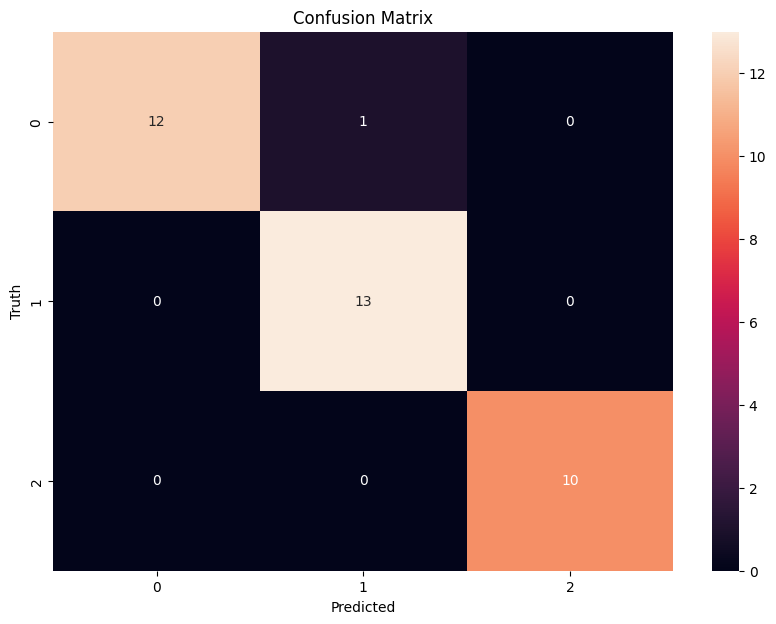

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

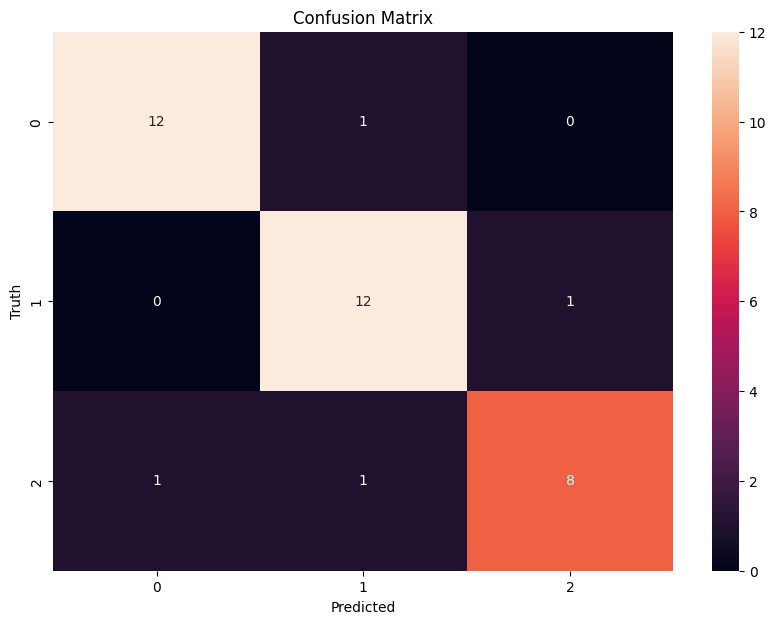

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pandas as pd

sp=pd.read_csv('spam.csv')
sp

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
ins=sp.apply(lambda x : 1 if x['Category'] == 'ham' else 0 , axis=1)
ins

,0
0,1
1,1
2,0
3,1
4,1
...,...
5567,0
5568,1
5569,1
5570,1


**CountVectorizer** it converts sentance into vectors like one hot encoding

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
ins=cv.fit_transform(sp.Message)

NameError: name 'sp' is not defined

**KNN** it works by using the nearest neighbors classification if one datapoint have 3 neighbor points which is group a 2 points group b  and 1 point group c then that one datapoint is group a. we define the number of neighbors to check in by defining k value if 3 , 3 meighbors is checked...

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
ir=load_iris()
dir(ir)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
x_train,x_test,y_train,y_test=train_test_split(ir.data,ir.target,test_size=0.2)

In [5]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [6]:
knn.score(x_test,y_test)

0.9333333333333333

<Axes: >

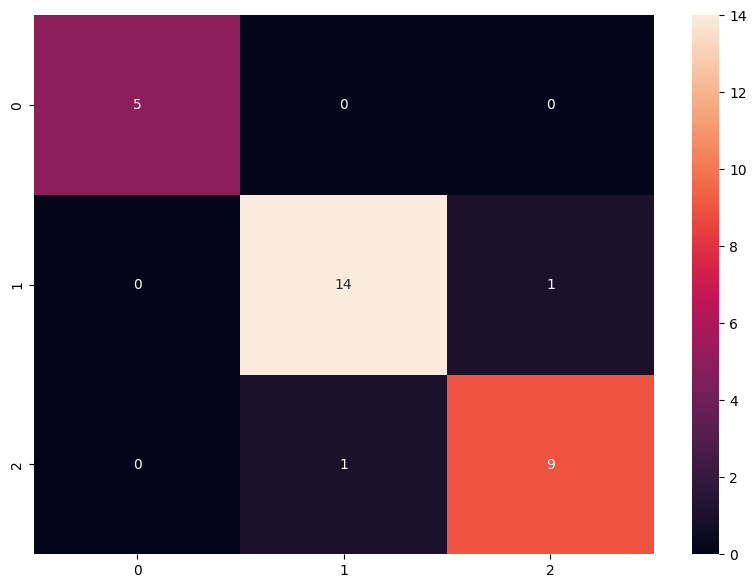

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,knn.predict(x_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)

In [18]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[3,6,9,12,15],'n_jobs':[1,2,3,4]}, cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [1, 2, 3, 4],
                         'n_neighbors': [3, 6, 9, 12, 15]})

In [19]:
gs.best_params_

{'n_jobs': 1, 'n_neighbors': 3}

**Lasso And Ridge Regression L1,L2**

In [32]:
from sklearn.linear_model import Lasso , RidgeClassifier , LinearRegression , Ridge
from sklearn.datasets import load_digits

In [22]:
d=load_digits()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(d.data,d.target,test_size=0.2)
la=Lasso(alpha=0.5 )
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [45]:
ri=RidgeClassifier(alpha=0.7)
ri.fit(x_train,y_train)

RidgeClassifier(alpha=0.7)

In [41]:
la.score(x_test,y_test)

0.48701228416342046

In [46]:
ri.score(x_test,y_test)

0.9583333333333334

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
lr.score(x_test,y_test)

0.5257122414793215

In [33]:
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [34]:
r.score(x_test,y_test)

0.526431809154853

**PCA** dimension reduction

In [47]:
from sklearn.decomposition import PCA

In [51]:
d.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


pd.DataFrame(d.data, columns=d.feature_names)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [64]:
dpca=PCA(n_components=29)
dp=dpca.fit_transform(d.data)

In [65]:
pd.DataFrame(dp)

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.259466,-21.274883,9.463055,-13.014189,7.128823,7.440659,-3.252837,-2.553470,0.581842,-3.625697,...,3.462119,2.680850,1.009450,2.009703,1.295315,1.178879,2.300582,3.670721,0.943669,1.132502
1,7.957611,20.768699,-4.439506,14.893664,-5.896249,6.485622,-2.126228,4.615936,-3.587450,1.074705,...,5.255708,-1.205777,-4.838902,0.860251,-2.974439,5.288817,0.119213,2.182618,0.510227,-2.313549
2,6.991923,9.955986,-2.958558,12.288302,18.126023,4.507664,-1.843122,16.415200,-0.719233,-4.255805,...,-8.731076,4.951115,-2.465109,5.999388,0.105727,-3.062671,0.166046,4.228821,-2.157657,-0.837958
3,-15.906105,-3.332464,-9.824372,12.275838,-6.965169,-1.089483,1.042085,-10.973556,3.259735,-6.498753,...,3.876889,0.269413,3.623236,2.538124,-1.354896,-1.740973,-1.340244,-5.846014,-4.682220,1.113042
4,23.306867,-4.269061,5.675129,13.851524,0.358124,2.857574,0.720497,-13.041696,3.835413,-13.414164,...,-5.035236,0.206830,5.740696,-7.611946,3.991408,2.781007,-0.166739,0.484305,-0.627979,3.287348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,-14.606628,-13.344124,13.439048,6.502950,-3.787472,2.729848,4.432327,3.914347,-7.320933,8.449179,...,-1.613182,1.732102,2.198947,0.273557,2.325997,0.547892,-2.445219,4.914990,0.183197,2.788351
1793,6.464574,-20.567299,9.155110,-12.554091,9.015978,13.707147,-3.831286,3.756258,7.192802,5.239837,...,0.317365,-3.994398,-1.577277,-0.578987,1.222268,2.432416,-1.134583,-0.048710,0.304789,3.483718
1794,10.801284,6.960252,-5.599555,7.227733,3.459646,12.375204,4.489790,7.415072,3.961585,13.065095,...,-2.400419,-0.732898,4.330780,0.180299,3.817864,-5.421945,4.431521,-3.568662,-1.824444,-3.538859
1795,-4.872100,-12.423954,10.170866,6.668850,-3.569061,0.003897,2.994734,4.357892,-3.939242,13.145255,...,0.076164,1.871624,-1.486850,3.125878,-3.757649,5.096836,-2.690764,3.253301,-0.954842,0.938956


by reducing this dimenstions we can use this for model building and have same accuracy but with less computation and dimenstions